# Vectors with Python
First, numpy and matplotlib need to be imported. Matplotlib needs to be made inline for the notebook, and seaborn needs to be imported to make the plots look prettier.

Note that the 3D toolkit of matplotlib is being imported.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import numpy.linalg as la

Next, the style is set to white-grid (personal preference), and the context is set to talk to make viewing the charts easier (bigger numbers and plots).

In [2]:
sns.set(style='whitegrid')
sns.set_context('talk')

Now the vectors to be visualized need to be created. They will be stored as numpy array objects. Some 2D and 3D (or R2 and R3 - 2 and 3 dimensional real space, or the set of all possible 2 and 3 real-valued tuples) will be used.

A couple vectors from R1 will also be created for the simplest case.

In [3]:
u,v = np.array([6,0]), np.array([3,1])
u3,v3 = np.array([6,0,4]), np.array([3,5,6])
u1,v1 = np.array([6]), np.array([3])

The two functions below are only used for vector plots in R1. The results of the plots in R1 are shown in the following cell.

In [4]:
def plot_1d_vector(vector, origin=0, **kwargs):
    if len(vector) == 0: return
    v = vector[0]
    return plt.arrow(origin, 0, vector[0], 0,
                     length_includes_head=True,
                     width=0.1, **kwargs)

def get_1d_axis(*vectors):
    min_x = min(min(vectors), 0) - 2
    max_x = max(max(vectors), 0) + 2
    plt.plot([min_x,max_x], [0,0])
    return plt.axis([min_x, max_x,
                     -1, 1])

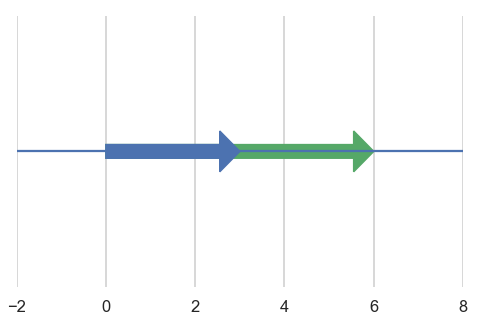

In [5]:
figure = plt.figure(figsize=(8,5))
plot_1d_vector(u1, color='g')
plot_1d_vector(v1, color='b')
get_1d_axis(u1,v1)
sns.despine(left=True, bottom=True, right=True, top=True)
plt.gca().yaxis.set_visible(False)

The functions below create the axes for the R2 and R3 vector plots. They are really just to ensure the vectors can be seen completely when plotted. The z-axis must be obtained separately for R3 vector plots.

In [6]:
def get_xy_axes(*vectors):
    """Get appropriate x and y axes for vectors."""
    if len(vectors) == 0:
        return
    if vectors[0].size == 2:
        return get_2d_xy_axes(*vectors)
    elif vectors[0].size == 3:
        return get_3d_xy_axes(*vectors)
    else:
        print('Only vectors in R2 and R3 are allowed as plotting inputs.')
        

def get_z_axis(axes, *vectors):
    """Get appropriate z axis for R3 vector."""
    x,y,z = zip(*vectors)
    min_z = min(min(z), 0)
    max_z = max(max(z), 0) + 2
    return axes.set_zlim(min_z, max_z)

        
def get_2d_xy_axes(*vectors):
    x,y = zip(*vectors)
    min_x = min(min(x)-1, 0)
    min_y = min(min(y)-1, 0)
    max_x = max(max(x)+2, 0)
    max_y = max(max(y)+2, 0)
    return plt.axis([min_x, max_x,
                     min_y, max_y])

def get_3d_xy_axes(*vectors):
    x,y,z = zip(*vectors)
    min_x = min(min(x), 0)
    min_y = min(min(y), 0)
    max_x = max(max(x)+2, 0)
    max_y = max(max(y)+2, 0)
    return plt.axis([min_x, max_x,
                     max_y, min_y])

The functions below actually plot the R2 and R3 vectors. They can either be plotted as single points in n-dimensional space or arrow representations in n-dimensional space.

In [7]:
plot_types = ['arrow',
              'scatter']

def plot_vector(vector, origin=[0,0], plot_type=plot_types[0],
                axes=None, display_norm=False, **kwargs):
    """Plots vectors in R2 and R3.
    
    Returns plt if plotting in R2.
    Returns Axes3D if plotting in R3.
    
    If plotting multiple vectors in R3,
    pass in the returned axes from the
    first plot for subsequent plots.
    """
    
    if vector.size == 2:
        return plot_2d_vector(vector, origin, plot_type,
                              display_norm, **kwargs)
    elif vector.size == 3:
        return plot_3d_vector(vector, origin, plot_type, axes,
                              display_norm, **kwargs)
    else:
        print('Only vectors in R2 and R3 are allowed as plotting inputs.')
        
        
def plot_2d_vector(vector, origin, plot_type,
                   display_norm, **kwargs):
    if plot_type == plot_types[0]:
        plt.arrow(origin[0], origin[1],
                  vector[0], vector[1],
                  length_includes_head=True,
                  width=0.1, **kwargs)
        if display_norm:
            plt.annotate(f'norm: {la.norm(vector):.2f}',
                         vector)
    elif plot_type == plot_types[1]:
        x,y = zip(vector)
        plt.scatter(x, y, **kwargs)
    else:
        print('Desired plot not supported.')
        
    return plt

def plot_3d_vector(vector, origin, plot_type, axes,
                   display_norm, **kwargs):
    if axes == None:
        fig = plt.figure(figsize=(10,7))
        ax3 = fig.add_subplot(111, projection='3d')
    else:
        ax3 = axes
        
    x,y,z = vector
    ax3.invert_xaxis()
    ax3.plot([x,x], [y,y], [0,z], linestyle=':')
    ax3.plot([x,x], [0,y], [z,z], linestyle=':')
    ax3.plot([0,x], [y,y], [z,z], linestyle=':')
    
    if plot_type == plot_types[0]:
        ax3.quiver(0,0,0,x,y,z,
                   linewidth=2,
                   **kwargs)
        if display_norm:
            ax3.text(*vector, f'norm: {la.norm(vector):.2f}')
    elif plot_type == plot_types[1]:
        ax3.scatter(x, y, z, **kwargs)
    else:
        print('Desired plot not supported.')
        
    return ax3

Now it's time to show the interesting plots. The vectors of R2 and R3 are plotted below. The 3D plots use dashed lines to give the illusion of depth.

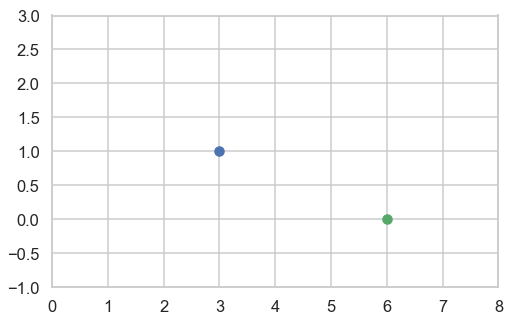

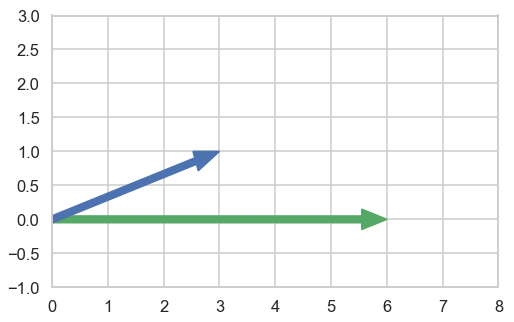

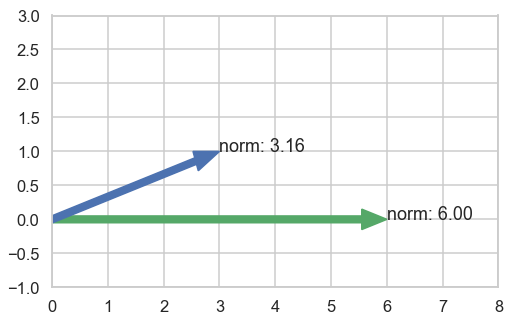

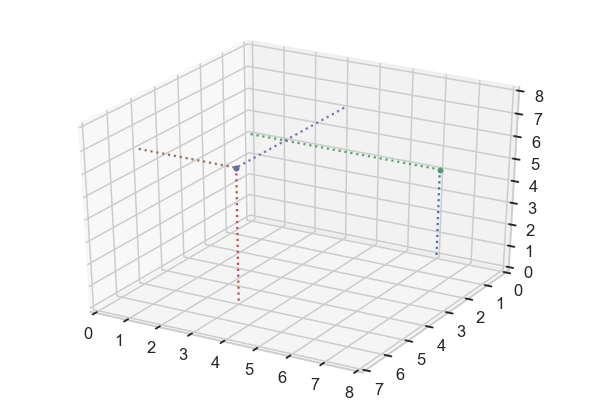

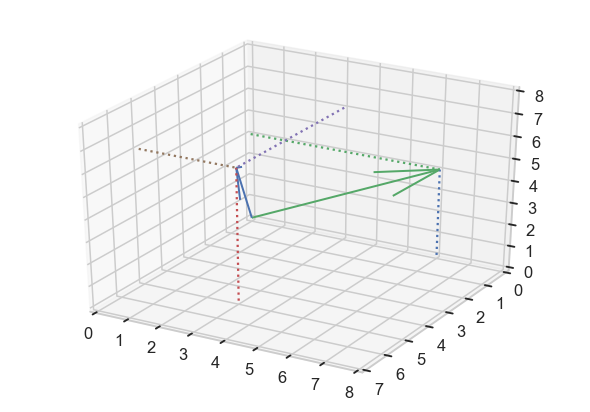

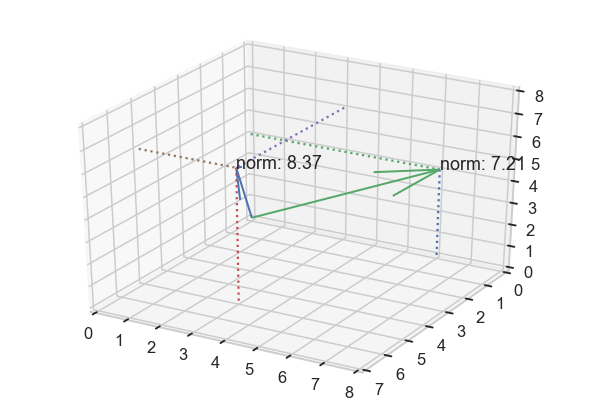

In [8]:
figure = plt.figure(figsize=(8,5))
plot_vector(u, plot_type='scatter', color='g')
plot_vector(v, plot_type='scatter', color='b')
get_xy_axes(u,v)

figure = plt.figure(figsize=(8,5))
plot_vector(u, color='g')
plot_vector(v, color='b')
get_xy_axes(u,v)

figure = plt.figure(figsize=(8,5))
plot_vector(u, display_norm=True, color='g')
plot_vector(v, display_norm=True, color='b')
get_xy_axes(u,v)

ax3 = plot_vector(u3, plot_type='scatter', color='g')
plot_vector(v3, plot_type='scatter', axes=ax3, color='b')
get_z_axis(ax3, u3, v3)
get_xy_axes(u3,v3)

ax3 = plot_vector(u3, color='g')
plot_vector(v3, axes=ax3, color='b')
get_z_axis(ax3, u3, v3)
get_xy_axes(u3,v3)

ax3 = plot_vector(u3, display_norm=True, color='g')
plot_vector(v3, axes=ax3, display_norm=True, color='b')
get_z_axis(ax3, u3, v3)
get_xy_axes(u3,v3)

plt.show()